In [26]:
import os

from bids import BIDSLayout
import nibabel as nib
from nilearn.image import load_img, resample_to_img, crop_img
from nilearn.input_data import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_harvard_oxford
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Specify the path to your BIDS dataset
bids_root = "/Users/cmokashi/Documents/GitHub/ukb2bids/bids/"

# Initialize the BIDS layout
layout = BIDSLayout(bids_root)

# Get all T1-weighted images
t1w_images = layout.get(suffix='T1w', extension='nii.gz')

print(f"Found {len(t1w_images)} T1w images.")

Found 13 T1w images.


In [28]:
# Fetch the Harvard-Oxford atlas
atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')

# Load the atlas image and labels
atlas_img = atlas['maps']
atlas_labels = atlas['labels']
atlas_labels = atlas_labels[1:]  # Remove background label

print(f"Atlas contains {len(atlas_labels)} regions.")

Atlas contains 48 regions.


In [29]:
# Load an example T1w image
t1w_path = t1w_images[0].path
t1w_img = load_img(t1w_path)

# Resample atlas to match the T1w image
resampled_atlas = resample_to_img(atlas_img, t1w_img, interpolation='nearest')

In [30]:
# Create a masker object
masker = NiftiLabelsMasker(labels_img=resampled_atlas, standardize=False)

# Extract region-wise signals (e.g., intensity/volume)
region_signals = masker.fit_transform(t1w_img)

# Convert signals to a DataFrame with region labels
volumes_df = pd.DataFrame(region_signals, columns=atlas_labels)
volumes_df.index = [os.path.basename(t1w_path)]
print(volumes_df.head())

# Save results
output_path = "volumetric_analysis.csv"
# volumes_df.to_csv(output_path)
print(f"Volumetric analysis saved to {output_path}")


                              Frontal Pole  ...  Occipital Pole
sub-1014336_ses-2_T1w.nii.gz     42.820758  ...       51.713197

[1 rows x 48 columns]
Volumetric analysis saved to volumetric_analysis.csv


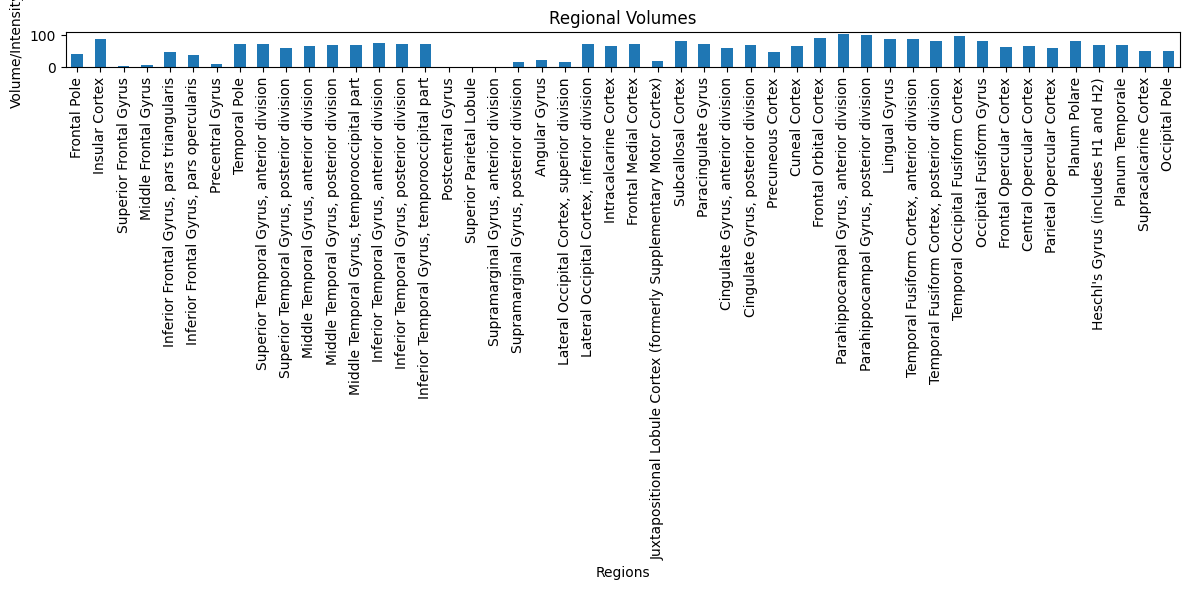

In [31]:
# Plot the volumes for this subject
volumes_df.T.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title("Regional Volumes")
plt.xlabel("Regions")
plt.ylabel("Volume/Intensity")
plt.tight_layout()
plt.show()


In [32]:
volumes_df

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division","Middle Temporal Gyrus, anterior division","Middle Temporal Gyrus, posterior division","Middle Temporal Gyrus, temporooccipital part","Inferior Temporal Gyrus, anterior division","Inferior Temporal Gyrus, posterior division","Inferior Temporal Gyrus, temporooccipital part",Postcentral Gyrus,Superior Parietal Lobule,"Supramarginal Gyrus, anterior division","Supramarginal Gyrus, posterior division",Angular Gyrus,"Lateral Occipital Cortex, superior division","Lateral Occipital Cortex, inferior division",Intracalcarine Cortex,Frontal Medial Cortex,Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex),Subcallosal Cortex,Paracingulate Gyrus,"Cingulate Gyrus, anterior division","Cingulate Gyrus, posterior division",Precuneous Cortex,Cuneal Cortex,Frontal Orbital Cortex,"Parahippocampal Gyrus, anterior division","Parahippocampal Gyrus, posterior division",Lingual Gyrus,"Temporal Fusiform Cortex, anterior division","Temporal Fusiform Cortex, posterior division",Temporal Occipital Fusiform Cortex,Occipital Fusiform Gyrus,Frontal Opercular Cortex,Central Opercular Cortex,Parietal Opercular Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole
sub-1014336_ses-2_T1w.nii.gz,42.820758,87.697375,3.729147,8.135959,47.106808,39.179544,10.423084,72.936025,73.361892,60.064273,67.066456,70.006947,69.240883,77.410956,73.072213,72.889919,2.114368,0.986994,0.883667,15.193429,23.223263,15.756663,72.54647,66.280286,74.19215,18.736908,81.441304,72.059393,61.535934,69.708862,46.440239,67.782464,90.301586,104.259241,102.478413,87.616332,89.621098,83.310095,99.065992,83.390288,64.4952,65.516418,60.900446,80.950094,69.590698,69.200822,51.771264,51.713197


In [39]:
file_entities: dict[str, str] = layout.parse_file_entities(t1w_images[0].path)
file_entities

{'subject': '1014336',
 'session': '2',
 'suffix': 'T1w',
 'datatype': 'anat',
 'extension': '.nii.gz'}